In [1]:
# Import and configure autoreload
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd 

meta = pd.read_pickle('/Users/robertodelprete/Desktop/AutoFocusNet/Data/DECODED/s1a-s3-raw-s-hh-20240524t213606-20240524t213631-054018-069139/s1a-s3-raw-s-hh-20240524t213606-20240524t213631-054018-069139_pkt_8_metadata.pkl')
ephemeris = pd.read_pickle('/Users/robertodelprete/Desktop/AutoFocusNet/Data/DECODED/s1a-s3-raw-s-hh-20240524t213606-20240524t213631-054018-069139/s1a-s3-raw-s-hh-20240524t213606-20240524t213631-054018-069139_ephemeris.pkl')
echo = pd.read_pickle('/Users/robertodelprete/Desktop/AutoFocusNet/Data/DECODED/s1a-s3-raw-s-hh-20240524t213606-20240524t213631-054018-069139/s1a-s3-raw-s-hh-20240524t213606-20240524t213631-054018-069139.pkl')

raw_data =  {'metadata':meta, 'ephemeris':ephemeris, 'echo':echo}

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
from SARLens.processor.focus import coarseRDA

focuser = coarseRDA(raw_data=raw_data)
focuser.data_focus()

Zarr packet not installed. Zarr functionalities will not work.
Elapsed time for fft2D: 233.8948 seconds
Elapsed time for get_range_filter: 0.1718 seconds
Elapsed time for _compute_effective_velocities: 40.2496 seconds
Elapsed time for get_RCMC: 199.4159 seconds
Elapsed time for ifft_rg: 156.7262 seconds
Elapsed time for get_azimuth_filter: 64.6721 seconds
Elapsed time for ifft_az: 93.1686 seconds
Elapsed time for data_focus: 967.3674 seconds


In [4]:
focuser.savefile(savepath='focus_test.pkl')

Elapsed time for savefile: 74.6179 seconds


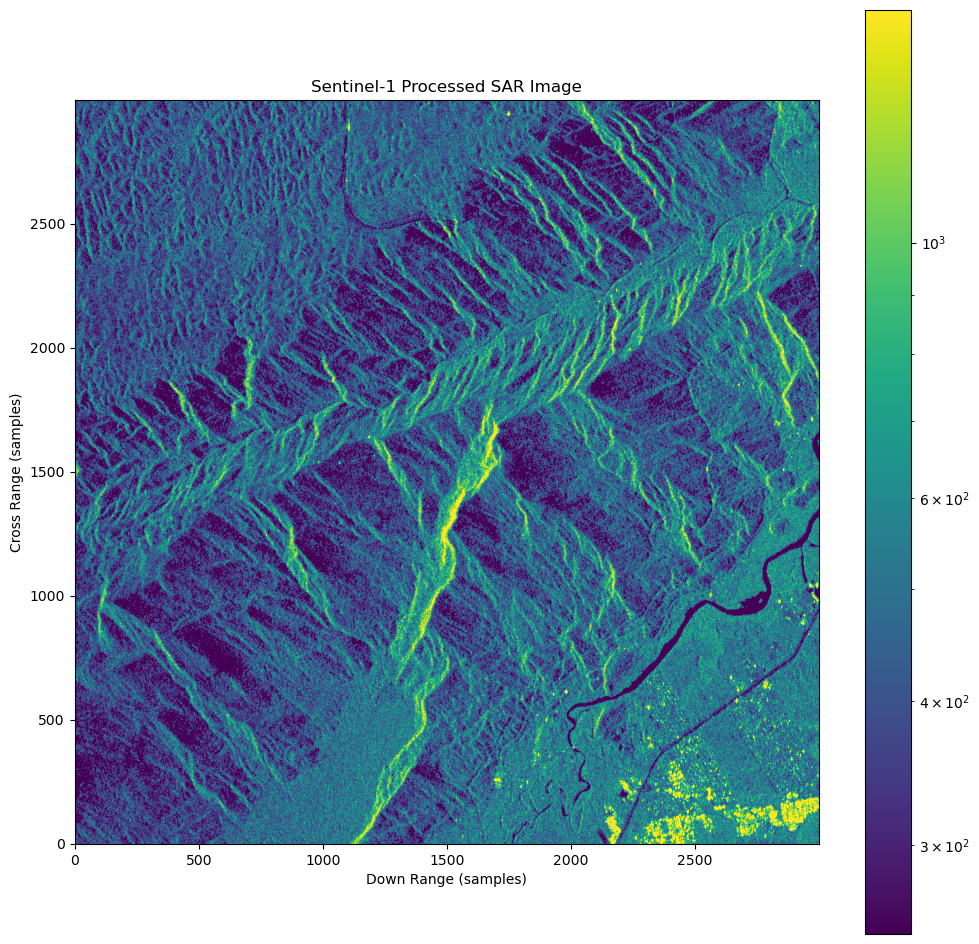

In [5]:
from SARLens.utils.io import plot_with_cdf
import pandas as pd 

test = pd.read_pickle('focus_test.pkl')

plot_with_cdf(test[12000:15000,2000:5000])

# Plot Times:

In [ ]:
# Reordering components as required
components = {
    "data_focus": 951.6573,
    "fft2D": 224.1521,
    "get_range_filter": 0.1063,
    "compute_effective_velocities": 42.2712,
    "get_RCMC": 183.5395,
    "ifft_rg": 156.4015,
    "get_azimuth_filter": 64.9742,
    "ifft_az": 95.2893
}

# Exclude 'data_focus' from the components for the stacked bar plot
components_stacked = {key: value for key, value in components.items() if key != "data_focus"}

# Calculate the starting position for each component except 'data_focus'
start_positions_stacked = [0] + list(np.cumsum(list(components_stacked.values())[:-1]))

# Creating the stacked bar plot
plt.figure(figsize=(16, 4))

# Plot 'data_focus' separately
plt.barh("data_focus", components["data_focus"], color='skyblue', label='data_focus')

# Plot the other components as stacked bars with different colors
colors = plt.cm.Paired(range(len(components_stacked)))
bottom = 0
for i, (component, value) in enumerate(components_stacked.items()):
    plt.barh("Components", value, left=bottom, color=colors[i], label=component)
    bottom += value

plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('Component')
plt.title('Elapsed Time for Each Component Leading to Complete Data Focus Time')
plt.legend(title='Components', loc='upper right')
plt.tight_layout()

# Display the plot
plt.show()